# Visualisation of COVID-19 datas

The goal of this notebook is to display on a Choropleth map informations related to COVID-19 at different moment in time.
We will use the open source [dataset](https://github.com/owid/covid-19-data/tree/master/public/data) maintained by [_Our World in Data_](https://ourworldindata.org/coronavirus).

### Table of content
1. Fetching the dataset
2. Understanding and preparation of the data
3. Building the Choropleth map

## 1. Fetching the dataset

First of all we need to import different libraries in order to get the datas, work with them and visualize them.

In [1]:
import numpy as np # Library to handle data in a vectorized manner
import pandas as pd # Library for data analsysis
import branca.colormap as cmp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # Library to handle JSON files

!pip3 install folium # Install the folium library
import folium # Map rendering library

Now that all necessary libraries have been imported, we need to put the dataset into a pandas dataframe. To do so we will use the read_csv function offered by pandas to get datas directly from the link of the repository.

In [2]:
covid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Dataset successfully downloaded !')

Dataset successfully downloaded !


Now that the dataset have been downloaded and transformed into a dataframe, we analyse the content of the dataframe.

In [3]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## 2. Understanding and preparation of the data

Now that we have correctly save the dataset we need to keep only few columns for this representation. We only want to display the total cases in each country over time. To do so we extract 5 columns:
 - iso_code
 - continent
 - location
 - date
 - total_cases
 
The others columns could be very useful in a more advanced context were the cause of contamination could be searched.

In [4]:
simp_covid_df = covid_df[['iso_code', 'continent', 'location', 'date', 'total_cases']]
simp_covid_df['location'].unique()

# We don't want the general number of case so we remove the 'World' entry
simp_covid_df = simp_covid_df[simp_covid_df.location != 'World']

Since we only want to check a specific date we need to create a new DataFrame with only the values of the desired day. Here we choose the christmas day.

In [5]:
xmas_df = simp_covid_df[simp_covid_df['date'] == '2020-12-25']
xmas_df.head(50)

,iso_code,continent,location,date,total_cases
305,AFG,Asia,Afghanistan,2020-12-25,50810.0
601,ALB,Europe,Albania,2020-12-25,55380.0
910,DZA,Africa,Algeria,2020-12-25,97441.0
1213,AND,Europe,Andorra,2020-12-25,7756.0
1498,AGO,Africa,Angola,2020-12-25,17099.0
1790,ATG,North America,Antigua and Barbuda,2020-12-25,155.0
2122,ARG,South America,Argentina,2020-12-25,1574554.0
2426,ARM,Asia,Armenia,2020-12-25,156763.0
2765,AUS,Oceania,Australia,2020-12-25,28297.0
3074,AUT,Europe,Austria,2020-12-25,349055.0


It seems to have large gaps between total cases. This will be an issue in the choropleth map because there will not be enough color shade and thus, the map will not have much interest. Let's check using a plot to make sure it's not only on the 50 first rows.

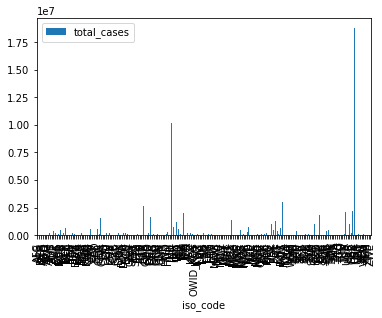

In [6]:
xmas_df.plot.bar(x='iso_code', y='total_cases')

The legend on the plot is not really understandable but what we can see is that the total number of cases have large gaps. In order to solve the problem for the representation we will create a new column with the natural logarithm value of the total_cases in order to normalise the data and see the variations on the map.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


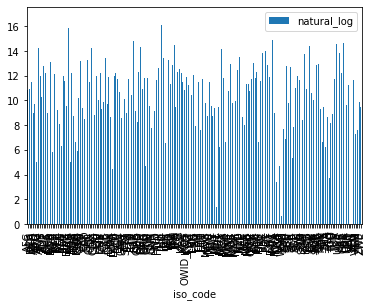

In [7]:
xmas_df['natural_log'] = np.log(xmas_df['total_cases'])
xmas_df.plot.bar(x='iso_code', y='natural_log')

Now that the data have been normalised and that the values seems more close to each other, let's create the choropleth map in order to visualise the evolution of COVID-19 accross the world.

## 3. Building the Choropleth map

We isolated the wanted columns but now we need to display it on a Choropleth map. First we will do a fixed map with the datas on the day of christmas and then we will do an interactive map with all the available datas from February 24th 2020 to today.

To do so we need to get a GeoJSON file in order to link data to countries on the map. This open source [file](https://github.com/johan/world.geo.json/blob/master/countries.geo.json) is perfect for what we are looking for. An other solution would have to generate the map using this [website](https://geojson.io/).

In [8]:
!wget --quiet 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

print('Geo JSON file downloaded !')

Geo JSON file downloaded !


Now that we have the GeoJSON file, let's create a world map centered on the coordinates [0,0].

In [9]:
world_geo = r'countries.geo.json'

And now to create the `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. world_geo, which is the GeoJSON file.
2. xmas_df, which is the dataframe containing the data.
3. columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest.

In [10]:
static_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    data=xmas_df,
    columns=['iso_code', 'natural_log'],
    key_on='feature.id',
    fill_color='OrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of COVID Cases in the world on Christmas 2020'
).add_to(static_map)

In [12]:
static_map

As we can see from the map, it's mostly the countries in the north of the emispherere that are affected by the virus. It can be explained by different factors. Either it's because of the temperature because she is lower in the north but we can see that in south america there is a large amount of case so it's not only this. Since the virus is more effective in the cold it's a tangible explanation.
An other possibility is that the number of test performed and the population amount of the countries are inequal so the number are biased. 

Either way we can see that the virus is more present in richer country where the health cares are better. It shows that the life lived by those richer population are not optimal to defeat the virus.
It also demonstrate that poorer countries can't be tested enough.